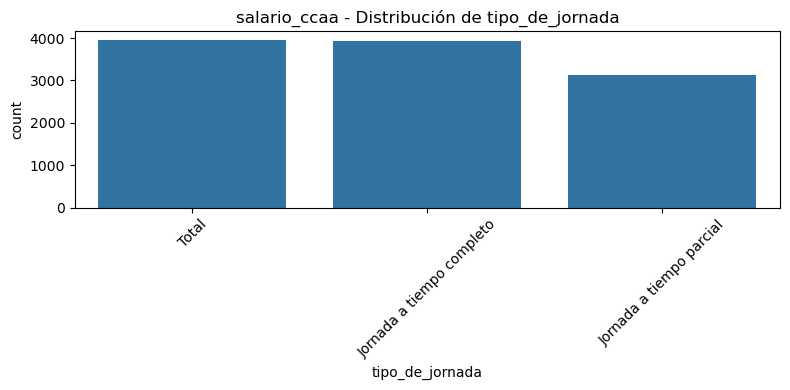

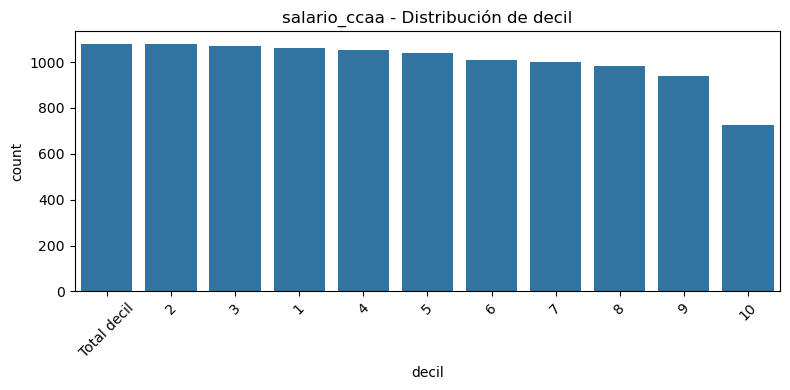

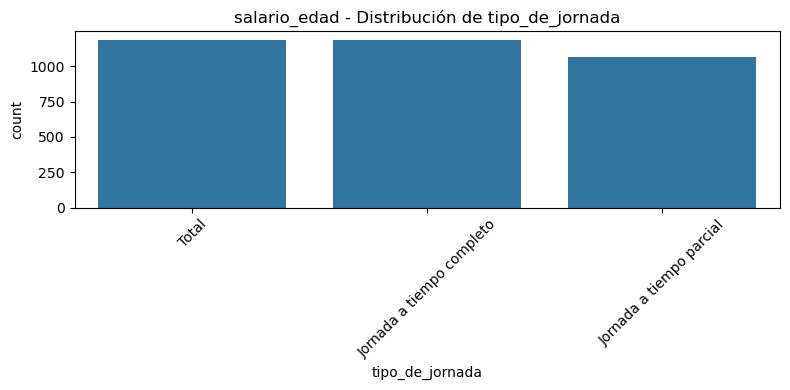

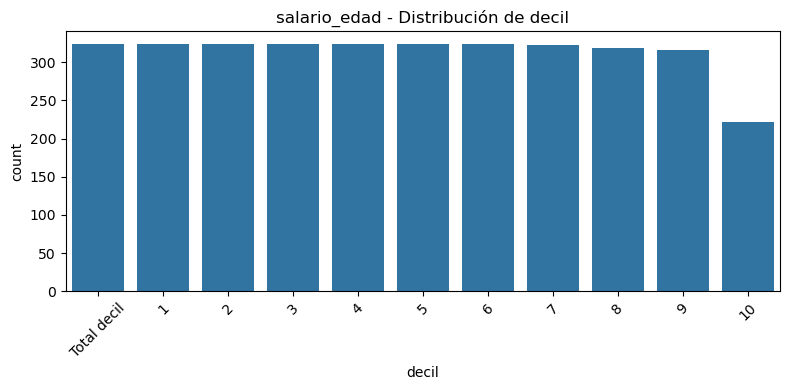

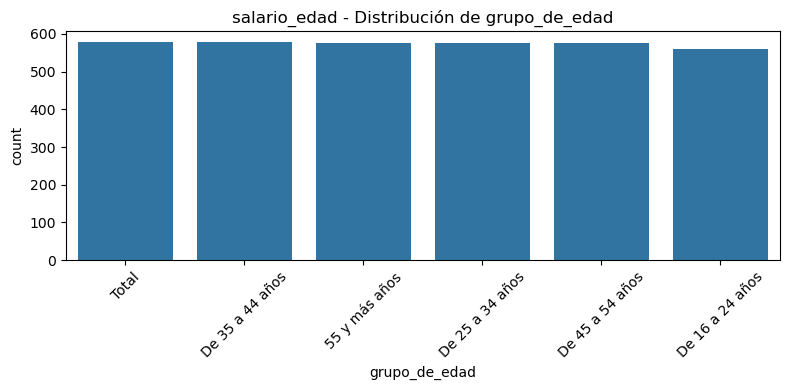

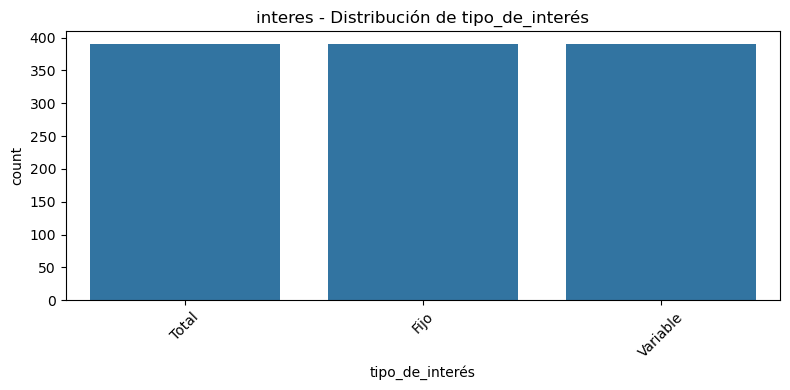

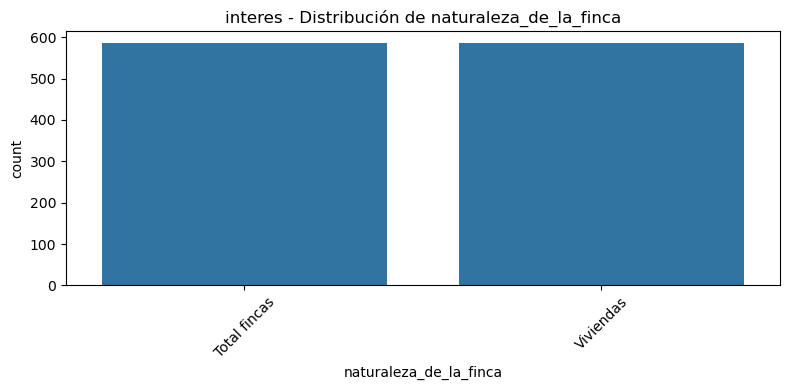

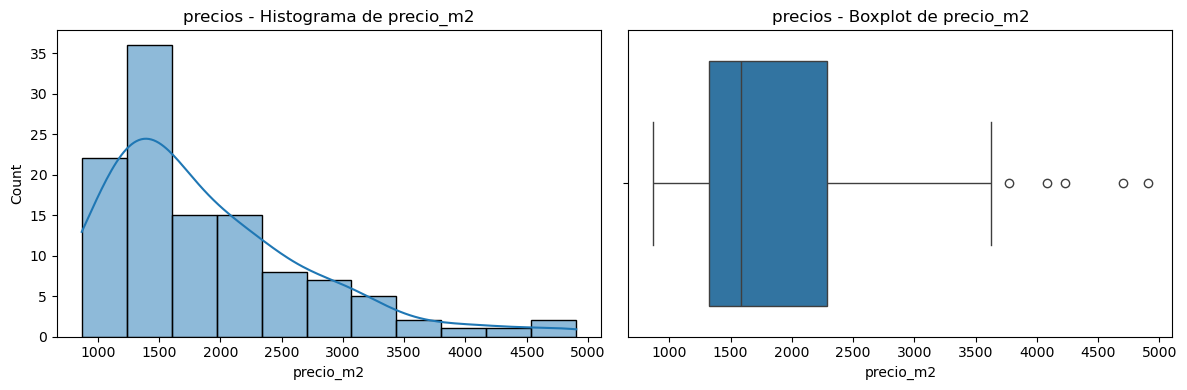

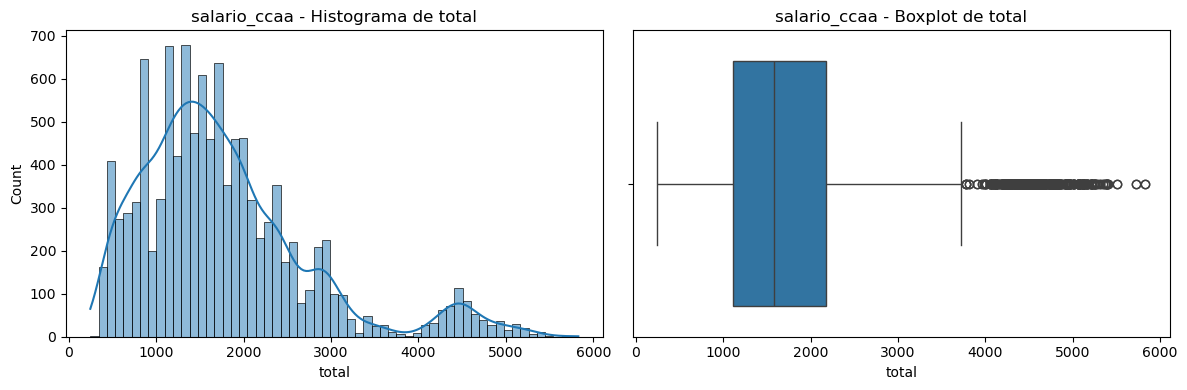

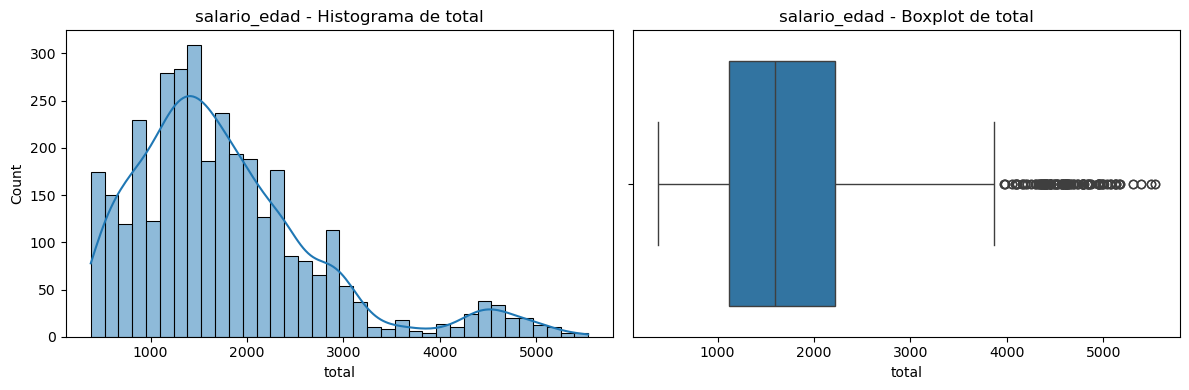

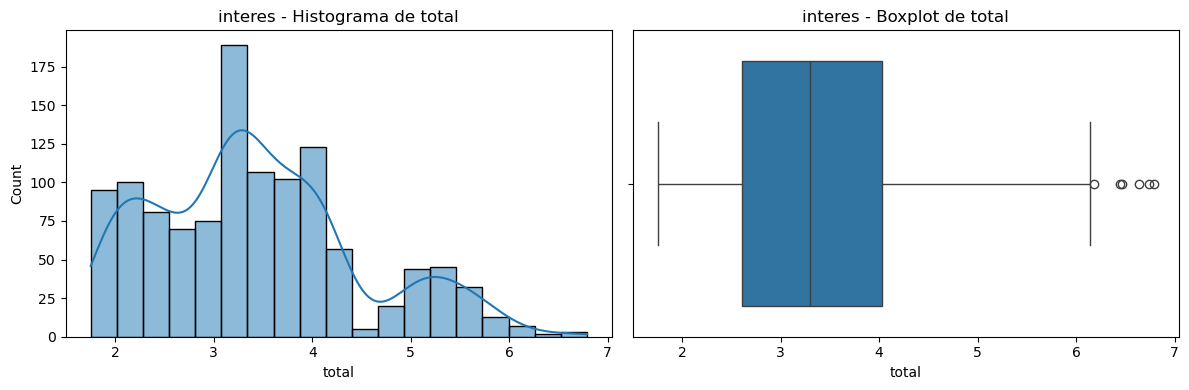

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datasets
data_files = {
    "precios": "../data/clean/precios_sql.csv",
    "salario_ccaa": "../data/clean/salario_ccaa_sql.csv",
    "salario_edad": "../data/clean/salario_edad_sql.csv",
    "interes": "../data/clean/interes_fijo_sql.csv"
}

dfs = {name: pd.read_csv(path) for name, path in data_files.items()}

# --- Funciones de visualización ---

def plot_categorical(df, col, dataset_name):
    """Muestra gráfico de barras para variable categórica"""
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{dataset_name} - Distribución de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_numerical(df, col, dataset_name):
    """Muestra histograma y boxplot para variable numérica"""
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"{dataset_name} - Histograma de {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"{dataset_name} - Boxplot de {col}")
    plt.tight_layout()
    plt.show()

# --- Variables relevantes por tipo ---
categorical_columns = {
    "salario_ccaa": ["tipo_de_jornada", "decil"],
    "salario_edad": ["tipo_de_jornada", "decil", "grupo_de_edad"],
    "interes": ["tipo_de_interés", "naturaleza_de_la_finca"]
}

numerical_columns = {
    "precios": ["precio_m2"],
    "salario_ccaa": ["total"],
    "salario_edad": ["total"],
    "interes": ["total"]
}

# --- Visualización de variables categóricas ---
for dataset, cols in categorical_columns.items():
    df = dfs[dataset]
    for col in cols:
        plot_categorical(df, col, dataset)

# --- Visualización de variables numéricas ---
for dataset, cols in numerical_columns.items():
    df = dfs[dataset]
    for col in cols:
        plot_numerical(df, col, dataset)


📊 Resumen variables categóricas - ipv


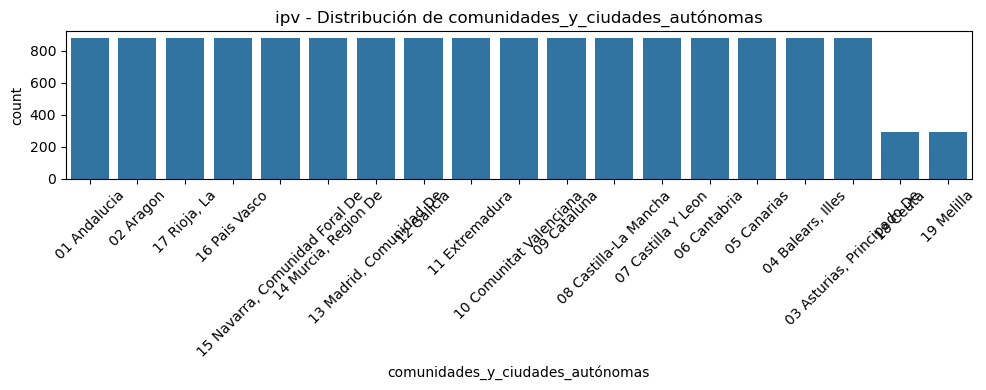

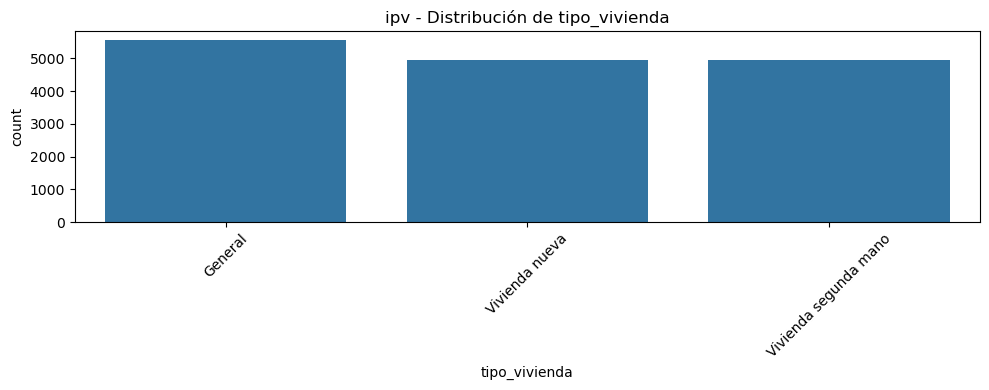

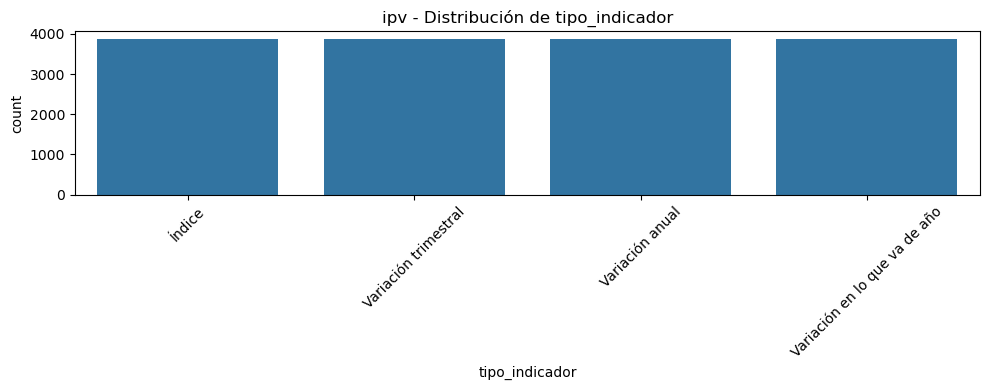

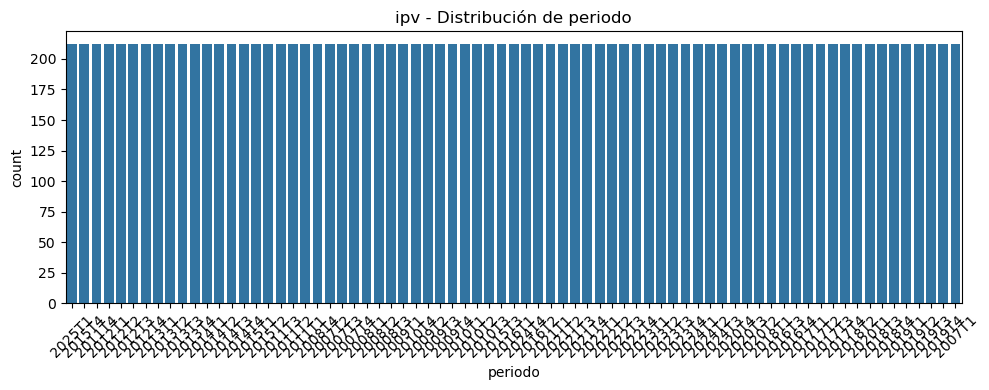

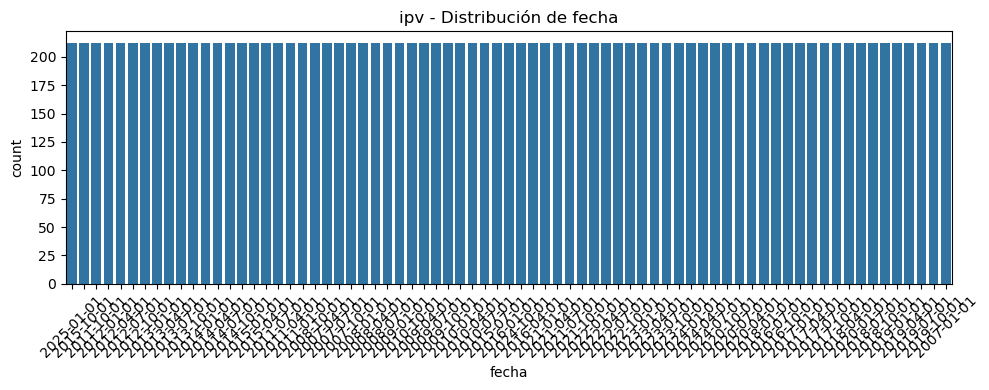

📈 Resumen variables numéricas - ipv


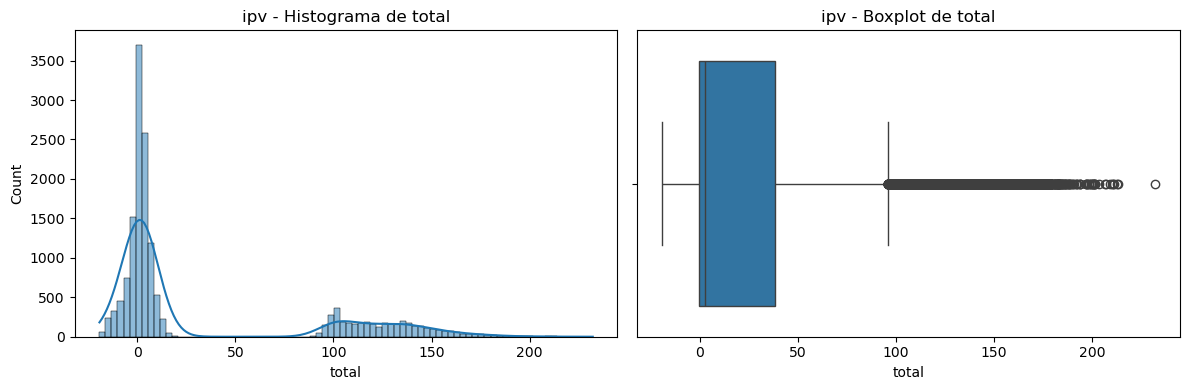

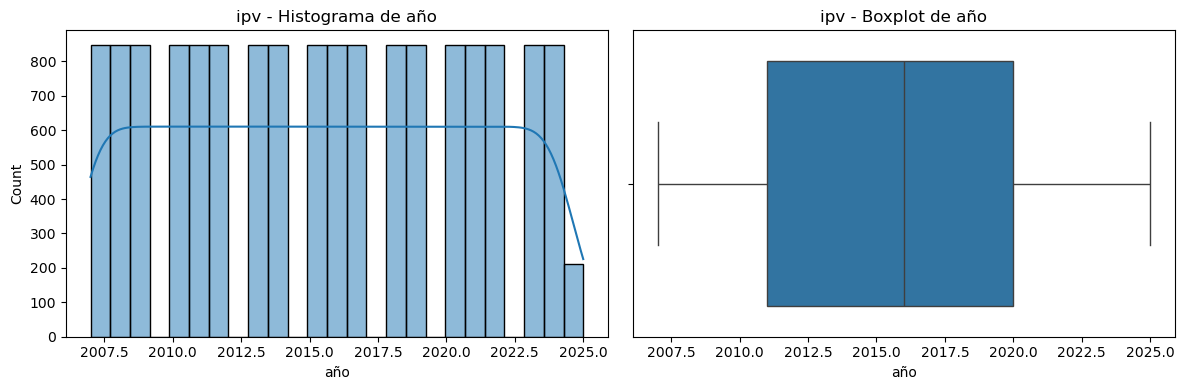

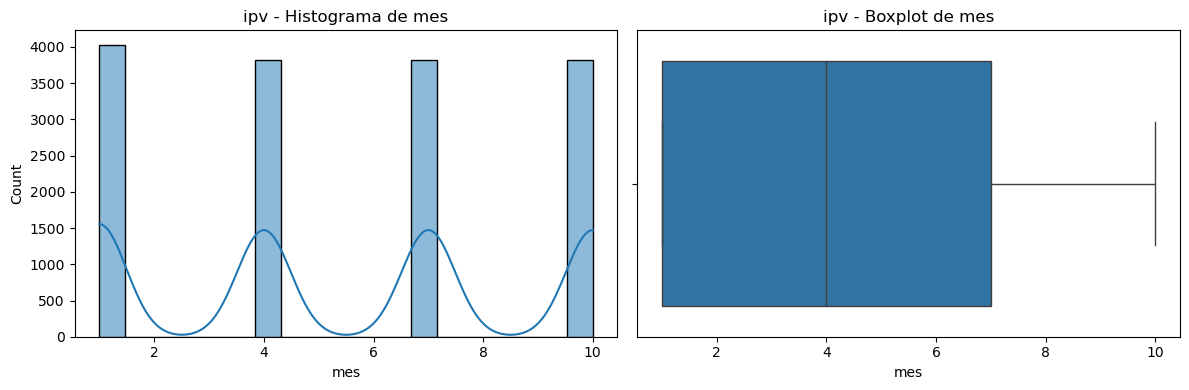

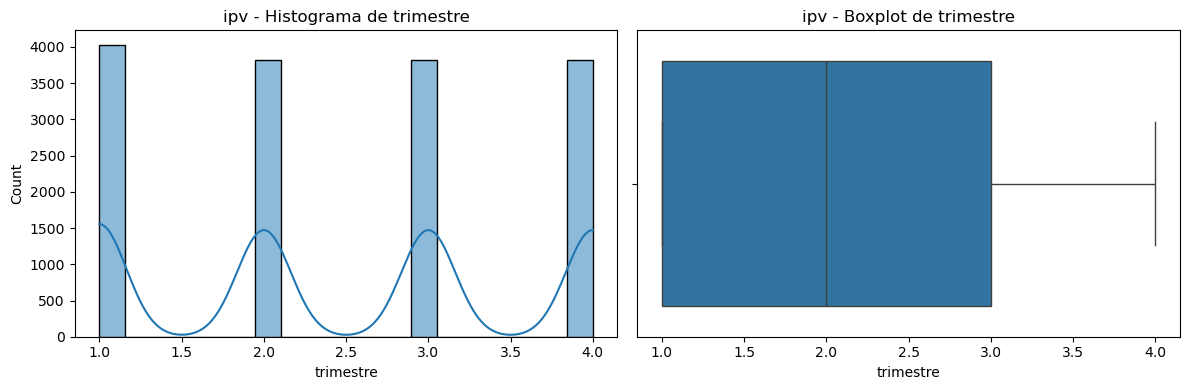

📊 Resumen variables categóricas - superficie


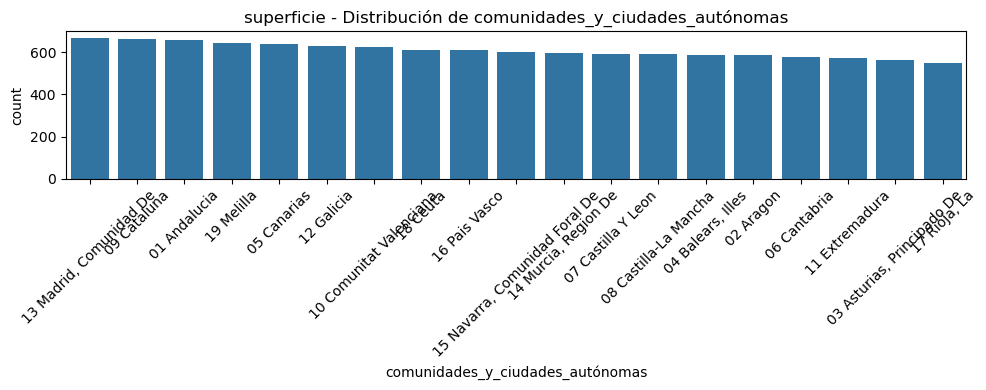

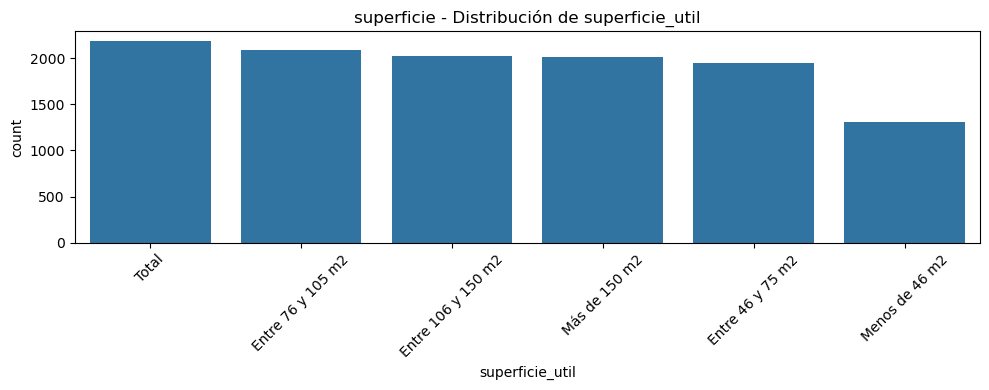

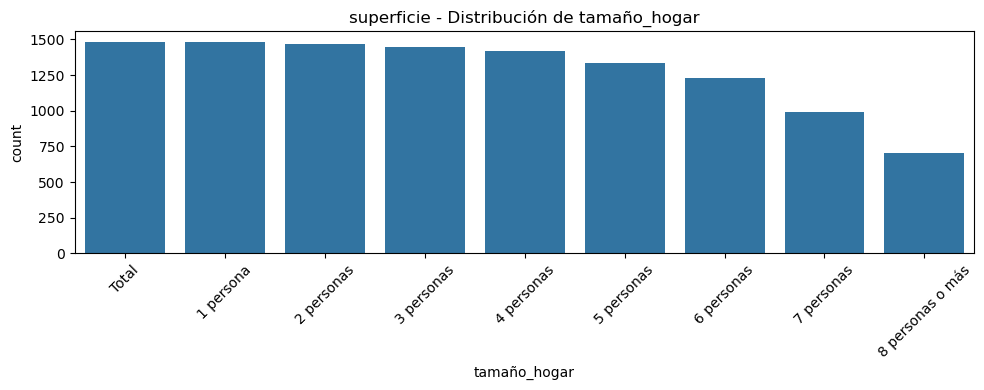

📈 Resumen variables numéricas - superficie


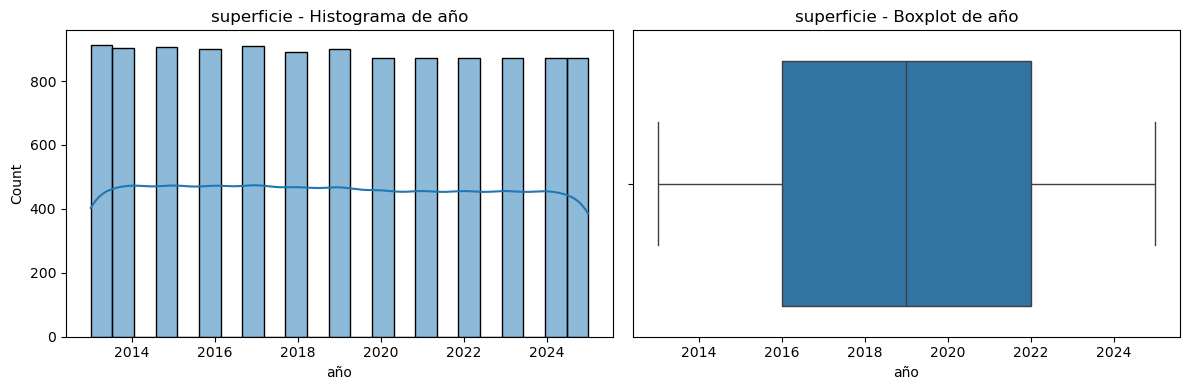

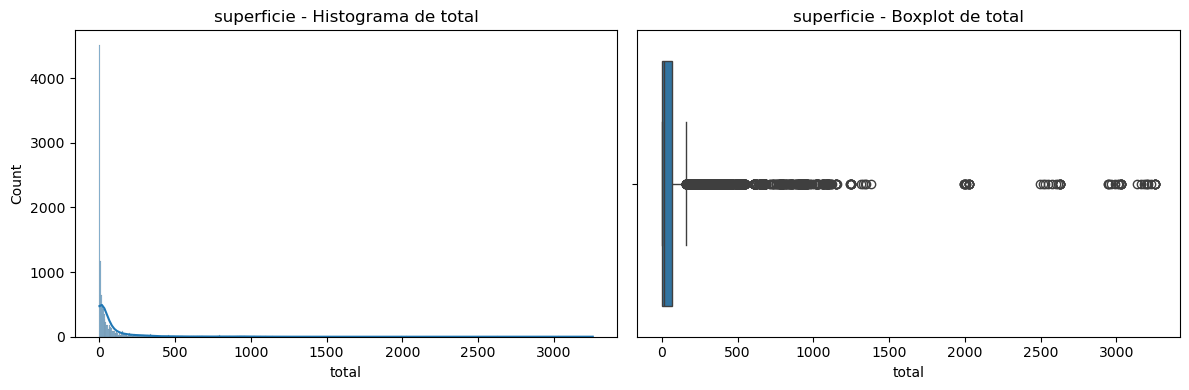

In [ ]:
# FUNCIONES 
def resumen_categoricas(df, titulo=''):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'{titulo} - Distribución de {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def resumen_numericas(df, titulo=''):
    num_cols = df.select_dtypes(include='number').columns
    for col in num_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'{titulo} - Histograma de {col}')
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'{titulo} - Boxplot de {col}')
        plt.tight_layout()
        plt.show()

#  CARGAR LOS DATOS 

df_ipv = pd.read_csv("../data/clean/ipv.csv")  # Ajusta el path si es necesario
df_superficie = pd.read_csv("../data/clean/superficie_extendida.csv")

# EJECUCIÓN 
print("Resumen variables categóricas - ipv")
resumen_categoricas(df_ipv, 'ipv')

print("Resumen variables numéricas - ipv")
resumen_numericas(df_ipv, 'ipv')

print("Resumen variables categóricas - superficie")
resumen_categoricas(df_superficie, 'superficie')

print("Resumen variables numéricas - superficie")
resumen_numericas(df_superficie, 'superficie')
